In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

In [2]:
col_drop = ['idauniq','fuerza_mano_d_1','fuerza_mano_nd_1','fuerza_mano_d_2','fuerza_mano_nd_2','fuerza_mano_d_3','fuerza_mano_nd_3','tiempo_caminar_1','tiempo_caminar_2','componentes']

In [3]:
variables_categoricas = ['estado_civil','sexo','escolaridad','CV_HTA','CV_stroke','CV_angina','CV_ICC','diabetes','EPOC','artrosis','osteoporosis','in_urinaria','d_mentales','fuma','alcohol','audicion','vision','caidas','estado_salud','dolor','equilibrio','test_silla','memoria','suenio','soledad','usa_internet_email','tiene_celular','soporte_social','demencia','depresion','actividad_fisica_1','actividad_fisica_2','actividad_fisica_3','fatigabilidad_1','fatigabilidad_2']
variables_numericas = ['edad','ingresos_brutos','obesidad_abdominal','indice_masa_corporal','altura','peso','fuerza_mano_d_promedio','tiempo_caminar_promedio']

In [4]:
# df = pd.read_csv('DATA_PROCESADA.csv')
df = pd.read_csv('DATA_PROCESADA_2.csv')
df = df.drop(columns=col_drop)
df = df[df['fragilidad'].notna()]

df.head()

,edad,estado_civil,sexo,escolaridad,ingresos_brutos,CV_HTA,CV_stroke,CV_angina,CV_ICC,diabetes,EPOC,IAM,asma,artrosis,osteoporosis,in_urinaria,d_mentales,fuma,alcohol,obesidad_abdominal,audicion,vision,caidas,estado_salud,dolor,equilibrio,test_silla,memoria,suenio,soledad,usa_internet_email,tiene_celular,soporte_social,demencia,depresion,indice_masa_corporal,altura,peso,actividad_fisica_1,actividad_fisica_2,actividad_fisica_3,fatigabilidad_1,fatigabilidad_2,fuerza_mano_d_promedio,tiempo_caminar_promedio,fragilidad
0,77,7,1,4.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,NaN,1.0,103.7,2,3,1.0,2.0,2.0,NaN,5.0,2.0,2.0,1.0,0.0,1.0,NaN,0.0,NaN,29.0,165.0,79.0,1.0,1.0,1.0,2.0,2.0,37.666667,NaN,0.0
1,55,4,2,4.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,NaN,3.0,110.4,1,2,NaN,3.0,1.0,0.0,10.0,4.0,2.0,3.0,0.0,1.0,NaN,0.0,1.0,36.3,158.4,91.0,4.0,2.0,1.0,2.0,1.0,24.000000,NaN,0.0
2,61,2,1,NaN,12000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,NaN,4.0,111.7,3,2,2.0,1.0,2.0,NaN,10.0,3.0,1.0,1.0,1.0,1.0,2.0,0.0,NaN,30.4,189.5,109.2,4.0,1.0,1.0,2.0,2.0,54.666667,2.205,0.0
3,70,2,1,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,NaN,5.0,94.5,3,2,2.0,1.0,2.0,NaN,5.0,5.0,2.0,1.0,1.0,1.0,NaN,0.0,NaN,22.5,177.2,70.8,1.0,1.0,1.0,2.0,2.0,42.666667,2.105,0.0
4,61,2,2,3.0,16000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,NaN,3.0,107.3,1,1,2.0,3.0,2.0,NaN,10.0,3.0,2.0,1.0,1.0,1.0,2.0,0.0,NaN,30.1,172.2,89.2,4.0,1.0,1.0,2.0,2.0,20.333333,3.490,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5248 entries, 0 to 5477
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   edad                     5248 non-null   int64  
 1   estado_civil             5248 non-null   int64  
 2   sexo                     5248 non-null   int64  
 3   escolaridad              5142 non-null   float64
 4   ingresos_brutos          1718 non-null   float64
 5   CV_HTA                   5245 non-null   float64
 6   CV_stroke                5245 non-null   float64
 7   CV_angina                5245 non-null   float64
 8   CV_ICC                   5245 non-null   float64
 9   diabetes                 5245 non-null   float64
 10  EPOC                     5243 non-null   float64
 11  IAM                      5245 non-null   float64
 12  asma                     5245 non-null   float64
 13  artrosis                 5241 non-null   float64
 14  osteoporosis             5244

### Primer análisis

In [6]:
columnas_eliminar = []
for i in df.columns:
    nulos = (df[i].isna().sum())*100/len(df)
    if nulos > 50:
        print(i,'-> % nulos:',nulos)
        columnas_eliminar.append(i)

df_prueba_1 = df.drop(columns=columnas_eliminar)
df_prueba_1.head()

ingresos_brutos -> % nulos: 67.26371951219512
fuma -> % nulos: 76.29573170731707
equilibrio -> % nulos: 85.27057926829268
soporte_social -> % nulos: 63.4717987804878
depresion -> % nulos: 91.92073170731707


,edad,estado_civil,sexo,escolaridad,CV_HTA,CV_stroke,CV_angina,CV_ICC,diabetes,EPOC,IAM,asma,artrosis,osteoporosis,in_urinaria,d_mentales,alcohol,obesidad_abdominal,audicion,vision,caidas,estado_salud,dolor,test_silla,memoria,suenio,soledad,usa_internet_email,tiene_celular,demencia,indice_masa_corporal,altura,peso,actividad_fisica_1,actividad_fisica_2,actividad_fisica_3,fatigabilidad_1,fatigabilidad_2,fuerza_mano_d_promedio,tiempo_caminar_promedio,fragilidad
0,77,7,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,103.7,2,3,1.0,2.0,2.0,5.0,2.0,2.0,1.0,0.0,1.0,0.0,29.0,165.0,79.0,1.0,1.0,1.0,2.0,2.0,37.666667,NaN,0.0
1,55,4,2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,3.0,110.4,1,2,NaN,3.0,1.0,10.0,4.0,2.0,3.0,0.0,1.0,0.0,36.3,158.4,91.0,4.0,2.0,1.0,2.0,1.0,24.000000,NaN,0.0
2,61,2,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,4.0,111.7,3,2,2.0,1.0,2.0,10.0,3.0,1.0,1.0,1.0,1.0,0.0,30.4,189.5,109.2,4.0,1.0,1.0,2.0,2.0,54.666667,2.205,0.0
3,70,2,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,5.0,94.5,3,2,2.0,1.0,2.0,5.0,5.0,2.0,1.0,1.0,1.0,0.0,22.5,177.2,70.8,1.0,1.0,1.0,2.0,2.0,42.666667,2.105,0.0
4,61,2,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,3.0,107.3,1,1,2.0,3.0,2.0,10.0,3.0,2.0,1.0,1.0,1.0,0.0,30.1,172.2,89.2,4.0,1.0,1.0,2.0,2.0,20.333333,3.490,0.0


## Preparación de data

In [7]:
data_limpiada = df_prueba_1

X = data_limpiada.drop(columns='fragilidad')
y = data_limpiada['fragilidad']

In [8]:
list_cat = []
list_num = []

for col in  X.columns:
    if col in variables_categoricas:
        list_cat.append(col)
    else:
        list_num.append(col)

In [9]:
list_cat_incompletas = []
list_num_incompletas = []

for col in X.columns:
    if X[col].isna().sum() != 0:
        if col in list_cat:
            list_cat_incompletas.append(col)
        else:
            list_num_incompletas.append(col)

**Imputar**

In [10]:
data = X
print(data.shape)

# Separar datos completos y faltantes
data_complete = data.dropna()
data_missing = data[data.isnull().any(axis=1)]

### COMPLETAR CATEGORICOS
for i in list_cat_incompletas:

    print(i)

    list_cat_act = list_cat.copy()
    list_cat_act.remove(i)
    
    xx = X.drop(columns=[i])
    yy = X[i]
    mask = yy.isna()

    xx_train = xx[~mask]
    yy_train = yy[~mask]
    xx_test = xx[mask]

    from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler

    numeric_transformer = Pipeline(steps=[
        ('scaler',StandardScaler()),
        ('imputer',SimpleImputer(strategy='mean'))])
    categorical_tranformer = Pipeline(steps=[
        ('onehot',OneHotEncoder(handle_unknown='ignore')),
        ('imputer',SimpleImputer(strategy='most_frequent'))])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num',numeric_transformer,list_num),
            ('cat',categorical_tranformer,list_cat_act)])
    pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('model',RandomForestClassifier(n_estimators=100,random_state=42))
    ])

    pipeline.fit(xx_train,yy_train)

    yy_pred = pipeline.predict(xx_test)

    X.loc[mask,i] = yy_pred

### COMPLETAR NUMERICOS
for i in list_num_incompletas:

    print(i)

    list_num_act = list_num.copy()
    list_num_act.remove(i)
    
    xx = X.drop(columns=[i])
    yy = X[i]
    mask = yy.isna()

    xx_train = xx[~mask]
    yy_train = yy[~mask]
    xx_test = xx[mask]

    from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler

    numeric_transformer = Pipeline(steps=[
        ('scaler',StandardScaler()),
        ('imputer',SimpleImputer(strategy='mean'))])
    categorical_tranformer = Pipeline(steps=[
        ('onehot',OneHotEncoder(handle_unknown='ignore')),
        ('imputer',SimpleImputer(strategy='most_frequent'))])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num',numeric_transformer,list_num_act),
            ('cat',categorical_tranformer,list_cat)])
    pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('model',RandomForestRegressor(n_estimators=100,random_state=42))
    ])

    pipeline.fit(xx_train,yy_train)

    yy_pred = pipeline.predict(xx_test)

    X.loc[mask,i] = yy_pred



(5248, 40)
escolaridad
CV_HTA
CV_stroke
CV_angina
CV_ICC
diabetes
EPOC
artrosis
osteoporosis
d_mentales
alcohol
caidas
estado_salud
dolor
test_silla
memoria
suenio
soledad
usa_internet_email
tiene_celular
demencia
actividad_fisica_1
actividad_fisica_2
actividad_fisica_3
fatigabilidad_1
fatigabilidad_2
IAM
asma
obesidad_abdominal
indice_masa_corporal
peso
fuerza_mano_d_promedio
tiempo_caminar_promedio


In [11]:
X.head()

,edad,estado_civil,sexo,escolaridad,CV_HTA,CV_stroke,CV_angina,CV_ICC,diabetes,EPOC,IAM,asma,artrosis,osteoporosis,in_urinaria,d_mentales,alcohol,obesidad_abdominal,audicion,vision,caidas,estado_salud,dolor,test_silla,memoria,suenio,soledad,usa_internet_email,tiene_celular,demencia,indice_masa_corporal,altura,peso,actividad_fisica_1,actividad_fisica_2,actividad_fisica_3,fatigabilidad_1,fatigabilidad_2,fuerza_mano_d_promedio,tiempo_caminar_promedio
0,77,7,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,103.7,2,3,1.0,2.0,2.0,5.0,2.0,2.0,1.0,0.0,1.0,0.0,29.0,165.0,79.0,1.0,1.0,1.0,2.0,2.0,37.666667,2.72055
1,55,4,2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,3.0,110.4,1,2,2.0,3.0,1.0,10.0,4.0,2.0,3.0,0.0,1.0,0.0,36.3,158.4,91.0,4.0,2.0,1.0,2.0,1.0,24.000000,2.96340
2,61,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,4.0,111.7,3,2,2.0,1.0,2.0,10.0,3.0,1.0,1.0,1.0,1.0,0.0,30.4,189.5,109.2,4.0,1.0,1.0,2.0,2.0,54.666667,2.20500
3,70,2,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,5.0,94.5,3,2,2.0,1.0,2.0,5.0,5.0,2.0,1.0,1.0,1.0,0.0,22.5,177.2,70.8,1.0,1.0,1.0,2.0,2.0,42.666667,2.10500
4,61,2,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,3.0,107.3,1,1,2.0,3.0,2.0,10.0,3.0,2.0,1.0,1.0,1.0,0.0,30.1,172.2,89.2,4.0,1.0,1.0,2.0,2.0,20.333333,3.49000


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
print(X_train.shape)
print('Fragiles train:',y_train.sum())
print('Fragiles test:',y_test.sum())

(3673, 40)
Fragiles train: 216.0
Fragiles test: 84.0


## Valores sinteticos

In [42]:
from imblearn.over_sampling import SMOTE

# Inicializamos SMOTE con la cantidad de vecinos a considerar
smote = SMOTE(sampling_strategy=0.4,random_state=42)  ############## 0.4

# Aplicamos SMOTE para generar los datos sintéticos
X_res, y_res = smote.fit_resample(X_train, y_train)

# Convertir los datos balanceados a un nuevo DataFrame
df_resampled = pd.DataFrame(X_res, columns=X.columns)
df_resampled['fragilidad'] = y_res

print(y_res.sum())
print(y_res.shape)

1382.0
(4839,)


## Variables importantes

### Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_res,y_res)

RandomForestClassifier(random_state=42)

## Elegir modelo

In [44]:
model = rfc

### Variables importantes

                    Feature  Importance
21             estado_salud    0.108634
34       actividad_fisica_2    0.106837
39  tiempo_caminar_promedio    0.084667
22                    dolor    0.068094
27       usa_internet_email    0.061406
0                      edad    0.045034
23               test_silla    0.040751
36          fatigabilidad_1    0.036363
38   fuerza_mano_d_promedio    0.032596
17       obesidad_abdominal    0.031183
37          fatigabilidad_2    0.030859
3               escolaridad    0.027981
20                   caidas    0.027831
25                   suenio    0.027461
30     indice_masa_corporal    0.025174
32                     peso    0.024657
33       actividad_fisica_1    0.022809
26                  soledad    0.022525
31                   altura    0.021469
28            tiene_celular    0.021334
35       actividad_fisica_3    0.017622
16                  alcohol    0.017224
24                  memoria    0.016862
1              estado_civil    0.012762


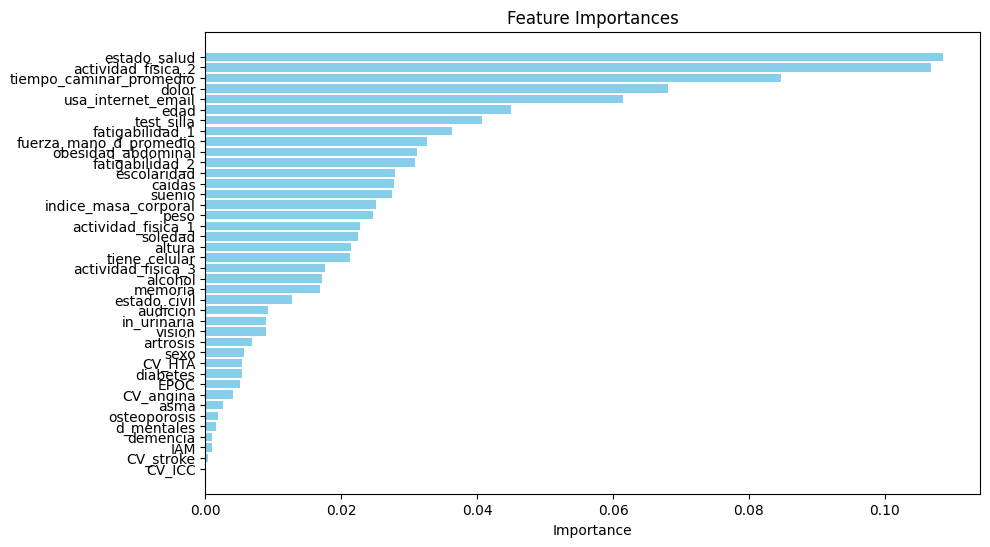

In [45]:
importances = model.feature_importances_

# Crear un DataFrame para mostrar las importancias
importance_df = pd.DataFrame({
    'Feature': X_res.columns.tolist(),
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [46]:
threshold = 0.015
important_features = importance_df[importance_df['Importance'] > threshold]
print(important_features)

selected_features = important_features['Feature'].tolist()

X_res = X_res[selected_features]
X_res = X_res.drop(columns='fuerza_mano_d_promedio') #### ------------------- ZXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXxx

list_cat_train = []
list_num_train = []

for i in X_res.columns:
    if i in variables_categoricas:
        list_cat_train.append(i)
    else:
        list_num_train.append(i)

                    Feature  Importance
21             estado_salud    0.108634
34       actividad_fisica_2    0.106837
39  tiempo_caminar_promedio    0.084667
22                    dolor    0.068094
27       usa_internet_email    0.061406
0                      edad    0.045034
23               test_silla    0.040751
36          fatigabilidad_1    0.036363
38   fuerza_mano_d_promedio    0.032596
17       obesidad_abdominal    0.031183
37          fatigabilidad_2    0.030859
3               escolaridad    0.027981
20                   caidas    0.027831
25                   suenio    0.027461
30     indice_masa_corporal    0.025174
32                     peso    0.024657
33       actividad_fisica_1    0.022809
26                  soledad    0.022525
31                   altura    0.021469
28            tiene_celular    0.021334
35       actividad_fisica_3    0.017622
16                  alcohol    0.017224
24                  memoria    0.016862


In [47]:

print(selected_features)

['estado_salud', 'actividad_fisica_2', 'tiempo_caminar_promedio', 'dolor', 'usa_internet_email', 'edad', 'test_silla', 'fatigabilidad_1', 'fuerza_mano_d_promedio', 'obesidad_abdominal', 'fatigabilidad_2', 'escolaridad', 'caidas', 'suenio', 'indice_masa_corporal', 'peso', 'actividad_fisica_1', 'soledad', 'altura', 'tiene_celular', 'actividad_fisica_3', 'alcohol', 'memoria']


## Preparacion para entrenamiento

**RFC**

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=42)

**XGBOOST**

In [49]:
import xgboost as xgb
xgb_c = xgb.XGBClassifier(
        objective='binary:logistic',  
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    )

### Entrenar

In [50]:
### Elección algoritmo
modelo_entrenamiento = xgb_c

In [51]:

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler



numeric_transformer = Pipeline(steps=[
        ('scaler',StandardScaler())])
categorical_tranformer = Pipeline(steps=[
        ('onehot',OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
        transformers=[
            ('num',numeric_transformer,list_num_train),
            ('cat',categorical_tranformer,list_cat_train)])
pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('model',modelo_entrenamiento)
    ])

# pipeline.fit(X_res,y_res)

In [52]:
# y_pred = pipeline.predict(X_test)

In [53]:
# X_res.shape

In [54]:
####
from scipy.stats import uniform, randint
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'model__n_estimators': randint(50, 500),
    'model__max_depth': randint(3, 15),
    'model__learning_rate': uniform(0.01, 0.3),
    'model__subsample': uniform(0.5, 0.5),
    'model__colsample_bytree': uniform(0.5, 0.5),
}

roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=50,  # Número de combinaciones a probar
    scoring=roc_auc_scorer,
    cv=5,  # Número de pliegues para validación cruzada
    verbose=1,
    random_state=42,
    n_jobs=-1  # Utilizar todos los núcleos disponibles
)

# Ajustar RandomizedSearchCV
random_search.fit(X_res, y_res)

# Obtener los mejores parámetros y el mejor ROC AUC
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Mejores parámetros encontrados:")
print(best_params)
print("Mejor ROC AUC obtenido:")
print(best_score)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/dallas/Documents/labic/env/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/dallas/Documents/labic/env/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant o

Mejores parámetros encontrados:
{'model__colsample_bytree': 0.5826334695315012, 'model__learning_rate': 0.01469092202235818, 'model__max_depth': 11, 'model__n_estimators': 393, 'model__subsample': 0.6974407590877849}
Mejor ROC AUC obtenido:
0.9888111949511587


In [55]:
# Obtener el mejor pipeline ajustado
best_pipeline = random_search.best_estimator_

# Entrenar el mejor modelo en todo el conjunto de datos
best_pipeline.fit(X_res, y_res)

/home/dallas/Documents/labic/env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [10:48:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tiempo_caminar_promedio',
                                                   'edad', 'obesidad_abdominal',
                                                   'indice_masa_corporal',
                                                   'peso', 'altura']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['estado_salud',
                                                   'actividad_fisica_2',
                                                   'dolor',
                                                   'usa_internet_ema...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.01469092202235818, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=11,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=393,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

**Guardar modelo**

In [70]:
import joblib
joblib.dump(best_pipeline, 'model_pipeline.pkl')

['model_pipeline.pkl']

In [56]:
y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva
roc_auc_test = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC en el conjunto de prueba:", roc_auc_test)

ROC AUC en el conjunto de prueba: 0.8466034301044361


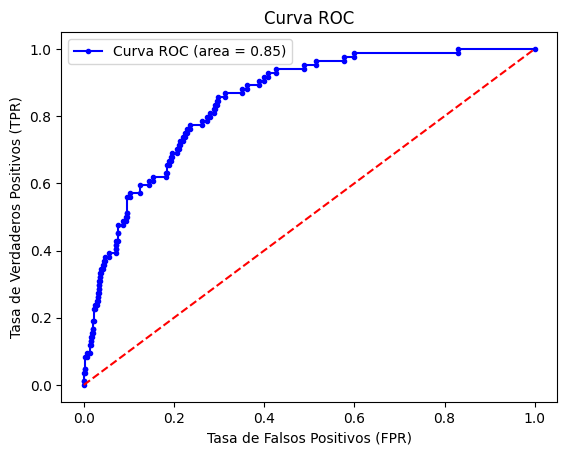

In [129]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Suponiendo que ya tienes el mejor modelo ajustado y el conjunto de prueba
y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcular FPR, TPR y umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el valor del ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Crear la gráfica de la curva ROC
plt.figure()
plt.plot(fpr, tpr, marker='.', color='b', label='Curva ROC (area = %0.2f)' % roc_auc)

# Añadir línea diagonal para referencia
plt.plot([0, 1], [0, 1], color='r', linestyle='--')

# Etiquetas y título
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()


In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Obtener las predicciones de clase
y_pred = best_pipeline.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precisión: 0.32
Recall: 0.10
F1-Score: 0.15


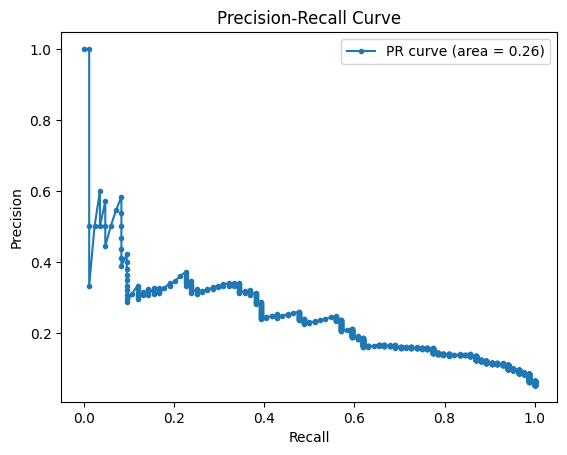

In [59]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calcular precisión, recall y umbrales
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
auc_pr = average_precision_score(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision, marker='.', label=f'PR curve (area = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [60]:
# Definir un umbral personalizado
threshold = 0.05

# Convertir probabilidades en predicciones de clase usando el umbral personalizado
y_pred = (y_pred_proba >= threshold).astype(int)

## Métricas

### Matriz de confusion

In [62]:
cm = confusion_matrix(y_test,y_pred)
# cm = confusion_matrix(y_test,y_pred)

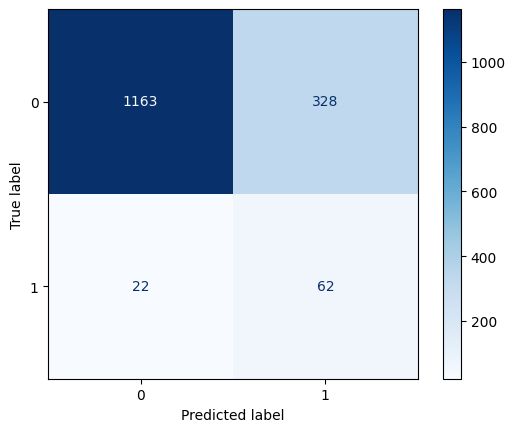

In [63]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Clasificación Report

In [64]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87      1491
         1.0       0.16      0.74      0.26        84

    accuracy                           0.78      1575
   macro avg       0.57      0.76      0.57      1575
weighted avg       0.94      0.78      0.84      1575



### AUC

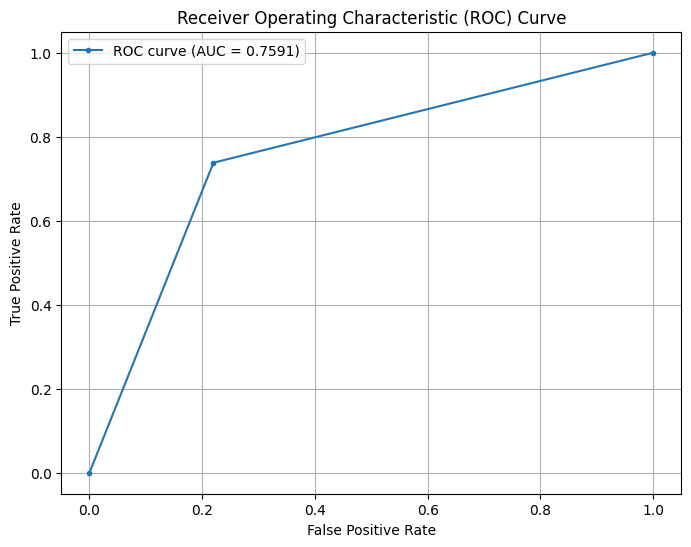

In [65]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calcular el AUC
auc = roc_auc_score(y_test, y_pred)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (AUC = {auc:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

In [66]:
auc = roc_auc_score(y_test, y_pred)

# Bootstrap para intervalo de confianza
def bootstrap_auc_ci(y_true, y_pred, n_bootstrap=1000, ci=0.95):
    aucs = []
    for _ in range(n_bootstrap):
        y_true_resample, y_proba_resample = resample(y_true, y_pred)
        aucs.append(roc_auc_score(y_true_resample, y_proba_resample))
    lower = np.percentile(aucs, (1 - ci) / 2 * 100)
    upper = np.percentile(aucs, (1 + ci) / 2 * 100)
    return auc, lower, upper

auc, auc_lower, auc_upper = bootstrap_auc_ci(y_test, y_pred)
print(f'AUC: {auc:.4f}')
print(f'AUC 95% CI: ({auc_lower:.4f}, {auc_upper:.4f})')

AUC: 0.7591
AUC 95% CI: (0.7108, 0.8053)


In [67]:
from sklearn.metrics import roc_curve

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Encontrar el umbral óptimo
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold:.4f}')


Optimal Threshold: 1.0000


### Metricas adicionales

In [68]:
y_pred = (y_pred >= optimal_threshold).astype(int)

# Calcular la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Sensibilidad (Recall)
sensitivity = tp / (tp + fn)
print(f'Sensitivity: {sensitivity:.4f}')

# Especificidad
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.4f}')

# PPV (Precisión)
ppv = tp / (tp + fp)
print(f'PPV (Positive Predictive Value): {ppv:.4f}')

# NPV (Valor Predictivo Negativo)
npv = tn / (tn + fn)
print(f'NPV (Negative Predictive Value): {npv:.4f}')

Sensitivity: 0.7381
Specificity: 0.7800
PPV (Positive Predictive Value): 0.1590
NPV (Negative Predictive Value): 0.9814


### Pruebas API

In [126]:
data2 = {
    "actividad_fisica_1": "recodejer",
    "actividad_fisica_2": "recodejer",
    "actividad_fisica_3": "recodejer",
    "acv": "recodejer",
    "alcohol": "alcohol",
    "altura": "2",
    "angina": "recodejer",
    "artrosis": "artrosisYrecodejer",
    "audicion": "audicion",
    "caidas": "movilidad",
    "caminar": "1",
    "dbt": "recodejerYdiabetes",
    "depresion[]": "1",
    "desordenes_mentales": "saludmental",
    "dibujo_reloj": "2",
    "dolor": "Sin dolor",
    "enfermedad_cardiovascular": "recodejer",
    "enfermedades[]": "1",
    "epoc": "epocYfumar",
    "escalones": "1",
    "escolaridad[]": "Primario incompleto",
    "estado_civil": "Casado",
    "estado_salud": "controlsalud",
    "fatiga": "1",
    "fatigabilidad_1": "suenio",
    "fatigabilidad_2": "saludemo",
    "fecha_nacimiento": "1950-11-01",
    "fuma": "fumar",
    "iam": "recodejer",
    "icc": "recodejer",
    "incontinencia": "incontinencia",
    "ingresos": "1",
    "memoria": "Excelente",
    "obesidad_abdominal": "obesidadYrecodejer",
    "ocupacion": "Profesional / Empresario / Cargo Gerencial",
    "osteoporosis": "recodejer",
    "peso": "90",
    "peso_perdido": "1",
    "problemas_equilibrio": "movilidad",
    "repeticion_palabras": "1",
    "repeticion_puntuacion": "0",
    "sexo_nacimiento": "Varon",
    "soledad": "Nunca o casi nunca",
    "soporte_social": "Alto",
    "suenio": "Muy Bueno",
    "test_silla": "10",
    "tiempo_caminar": "10",
    "tiene_celular": "redeso",
    "usa_intenet_email": "redeso",
    "vision": "vision"
  }

pd.DataFrame([data2])

,actividad_fisica_1,actividad_fisica_2,actividad_fisica_3,acv,alcohol,altura,angina,artrosis,audicion,caidas,caminar,dbt,depresion[],desordenes_mentales,dibujo_reloj,dolor,enfermedad_cardiovascular,enfermedades[],epoc,escalones,escolaridad[],estado_civil,estado_salud,fatiga,fatigabilidad_1,fatigabilidad_2,fecha_nacimiento,fuma,iam,icc,incontinencia,ingresos,memoria,obesidad_abdominal,ocupacion,osteoporosis,peso,peso_perdido,problemas_equilibrio,repeticion_palabras,repeticion_puntuacion,sexo_nacimiento,soledad,soporte_social,suenio,test_silla,tiempo_caminar,tiene_celular,usa_intenet_email,vision
0,recodejer,recodejer,recodejer,recodejer,alcohol,2,recodejer,artrosisYrecodejer,audicion,movilidad,1,recodejerYdiabetes,1,saludmental,2,Sin dolor,recodejer,1,epocYfumar,1,Primario incompleto,Casado,controlsalud,1,suenio,saludemo,1950-11-01,fumar,recodejer,recodejer,incontinencia,1,Excelente,obesidadYrecodejer,Profesional / Empresario / Cargo Gerencial,recodejer,90,1,movilidad,1,0,Varon,Nunca o casi nunca,Alto,Muy Bueno,10,10,redeso,redeso,vision


In [25]:
import requests

# Datos a enviar en formato JSON
data = {
    "actividad_fisica_1": "recodejer", #48
    "actividad_fisica_2": "recodejer", #49
    "actividad_fisica_3": "recodejer",
    "acv": "recodejer",
    "alcohol": "alcohol",
    "altura": "80",
    "angina": "recodejer",
    "artrosis": "artrosisYrecodejer",
    "audicion": "audicion",
    "caidas": "movilidad",
    "caminar": "1",
    "dbt": "recodejerYdiabetes",
    "depresion": "1",
    "desordenes_mentales": "saludmental",
    "dibujo_reloj": "2",
    "dolor": "Sin dolor", #32
    "enfermedad_cardiovascular": "recodejer",
    "enfermedades": "1",
    "epoc": "epocYfumar",
    "escalones": "1",
    "escolaridad": "Primario incompleto",
    "estado_civil": "Casado",
    "estado_salud": "controlsalud", #31
    "fatiga": "1",
    "fatigabilidad_1": "suenio",
    "fatigabilidad_2": "saludemo",
    "fecha_nacimiento": "1950-11-01",
    "fuma": "fumar",
    "iam": "recodejer",
    "icc": "recodejer",
    "incontinencia": "incontinencia",
    "ingresos": "1",
    "memoria": "Excelente",
    "obesidad_abdominal": "30",
    "ocupacion": "Profesional / Empresario / Cargo Gerencial",
    "osteoporosis": "recodejer",
    "peso": "90",
    "peso_perdido": "1",
    "problemas_equilibrio": "movilidad",
    "repeticion_palabras": "1",
    "repeticion_puntuacion": "0",
    "sexo_nacimiento": "Varon",
    "soledad": "Nunca o casi nunca",
    "soporte_social": "Alto",
    "suenio": "Muy Bueno",
    "test_silla": "10",
    "tiempo_caminar_promedio": "0.2", #35
    "tiene_celular": "redeso",
    "usa_internet_email": "redeso",
    "vision": "vision"
  }

# URL de la API
# url = 'http://127.0.0.1:8001' 
url = 'https://app-labic-service-339643390992.us-central1.run.app'

# Enviar una petición POST con los datos JSON
response = requests.post(url, json=data)

# Verificar el código de estado de la respuesta
if response.status_code == 200:
    print("La petición fue exitosa!")
    print(response.json())  # Imprimir la respuesta en formato JSON
else:
    print("Error:", response.status_code)
    print(response.text)

La petición fue exitosa!
{'prediction': 0.8514766097068787}
